<a href="https://colab.research.google.com/github/john-s-butler-dit/CaseStudy_PredatorPrey/blob/master/NA3_Rabbit%20Foxes%20Myxomatosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Assignment 3
Name and Student ID

## Problem 1
The code in Rabbit Foxes.ipynb solves a predator prey model for foxes (F) and rabbits (R) and saves the figures as png files. 

The system of differential equations is described by 

\begin{equation}
\begin{array}{cl}
\frac{d R}{dt}=a_{Birth} R-b_{Con}FR,\\
\frac{d F}{dt}=-c_{Death}F+d_{Food} FR,\\
\end{array}
\end{equation}

where
* $ a_{Birth} = 1 $
* $ b_{Con}  = 0.1 $
* $c_{Death} = 1.5$
* $d_{Food} = 0.075$




## Problem 1 code

In [ ]:
#!python
from numpy import *
import pylab as p
def plot_rabbit_fox(X0):
    # Definition of parameters
    a = 1
    b = 0.1
    c = 1.5
    d = 0.075
    def dX_dt(X, t=0):
         """ Return the growth rate of fox and rabbit populations. """
         return array([ a*X[0] -   b*X[0]*X[1] ,
                      -c*X[1] + d*b*X[0]*X[1] ])
    X_f0 = array([     0. ,  0.])
    X_f1 = array([ c/(d*b), a/b])
    #!python
    from scipy import integrate
    t = linspace(0, 15,  1000)              # time
    X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
    infodict['message']                     # >>> 'Integration successful.'
    #!python
    rabbits, foxes = X.T

    values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
    vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
    p.xkcd()
    f1 = p.figure(figsize=(14,4))
    p.subplot(121)

    p.plot(t, rabbits, 'r-', label='Rabbits')
    p.plot(t, foxes  , 'b-', label='Foxes')
    p.grid()
    p.legend(loc='best')
    p.xlabel('time')
    p.ylabel('population')
    p.title('Evolution of fox and rabbit populations')


    p.subplot(122)
    v=1
    #-------------------------------------------------------
    # plot trajectories
    #for v, col in zip(values, vcolors):
    #    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=vcolors[v,:], label='IC=(%.f, %.f)' % ( X0[0], X0[1]) )

    #-------------------------------------------------------
    # define a grid and compute direction at each point
    ymax = p.ylim(ymin=0)[1]                        # get axis limits
    xmax = p.xlim(xmin=0)[1]
    nb_points   = 20

    x = linspace(0, xmax, nb_points)
    y = linspace(0, ymax, nb_points)

    X1 , Y1  = meshgrid(x, y)                       # create a grid
    DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
    M = (hypot(DX1, DY1))                           # Norm of the growth rate
    M[ M == 0] = 1.                                 # Avoid zero division errors
    DX1 /= M                                        # Normalize each arrows
    DY1 /= M

    #-------------------------------------------------------
    # Drow direction fields, using matplotlib 's quiver function
    # I choose to plot normalized arrows and to use colors to give information on
    # the growth speed
    p.title('Trajectories and direction fields')
    Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
    p.xlabel('Number of rabbits')
    p.ylabel('Number of foxes')
    p.legend(bbox_to_anchor=(1.2, 1.0))
    p.grid()
    p.xlim(0, xmax)
    p.ylim(0, ymax)
    p.tight_layout()

## Problem 1 Question
From the output of the code write about the relationships between the foxes and rabbits for the different initial conditions.

Run the code for the three initial conditions

i) R(0)=200, F(0)=10

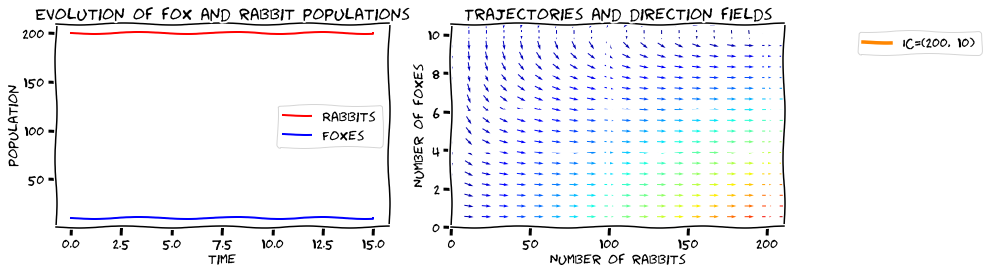

In [ ]:
INITIAL_CONDITION = array([200, 10])   
plot_rabbit_fox(INITIAL_CONDITION)

ii) R(0)=80,F(0)=12,


In [ ]:
## INSERT CODE FOR FOR ii) R(0)=80,F(0)=12


iii)  R(0)=20, F(0)=20,


In [ ]:
## INSERT CODE FOR FOR iii)  R(0)=20, F(0)=20.

Describe the different plots for the three different initial conditions.

## Problem 2
The plot below shows the simulation of a predator prey model for foxes (F) and rabbits (R) in Ireland from 1950 to 1980. In 1954 the Irish government introduced myxomatosis (M) as a method of reducing the rabbit population. The following system of equations describes this relationship:
\begin{equation}
\begin{array}{cl}
\frac{d R}{dt}= R-0.1FR-0.1R(M-1),\\
\frac{d F}{dt}=-1.5F+0.075 FR,\\
\frac{d M}{dt}=-M+0.1 MR.
\end{array}
\end{equation}
with the initial conditions R(1950)=25 , F(1950)=5, M(1950)=0.

## Problem 2 Code

In [ ]:
def myxomatosis_code():
  # DEFINITION OF PARAMETERS
  a = 1
  b = 0.1
  c = 1.5
  d = 0.075

  ## TIME
  N=10000
  t_start=1950.0
  t_end=1980.0

  t = linspace(t_start, t_end,  N)              # time

  # INITIAL CONDITIONS

  rabbits=zeros(N)
  foxes=zeros(N)
  myxomatosis=ones(N)
  rabbits[0]=25
  foxes[0]=4

  # EULER METHOD
  h=(t_end-t_start)/N

  for i in range (1,N):
      rabbits[i]=rabbits[i-1]+h*rabbits[i-1]*(a-b*(foxes[i-1]+(myxomatosis [i-1]-1)))
      foxes[i]=foxes[i-1]+h*foxes[i-1]*((-c+d*rabbits[i-1]))
      if t[i]>1954:
          myxomatosis[i]=myxomatosis[i-1]+h*myxomatosis[i-1]*(-1+0.1*rabbits[i-1])        
  p.xkcd()
  f1 = p.figure(figsize=(14,4))
  p.plot(t, rabbits, 'r-', label='Rabbits')
  p.plot(t, foxes  , 'b-', label='Foxes')
  p.plot(t, myxomatosis, 'g', label='myxomatosis')
  p.grid()
  p.legend(loc='best')
  p.ylim(-10, 50)
  p.xlabel('time')
  p.ylabel('population')
  p.title('Evolution of fox and rabbit populations in Ireland')
  p.show()

## Problem 2 Question




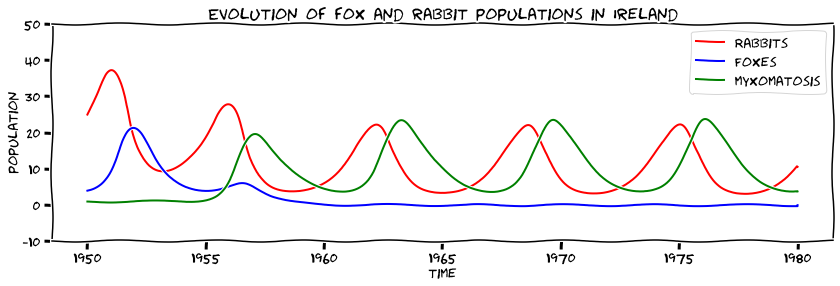

In [ ]:
myxomatosis_code()

i) From the plot and equations describe the relationship between rabbits, foxes and myxomatosis. 

ii) From this model do you think that the introduction did what it was intended to do?

## Reference
Wikipedia contributors. (2021, January 14). Myxomatosis. In Wikipedia, The Free Encyclopedia. Retrieved 15:21, February 22, 2021, from https://en.wikipedia.org/w/index.php?title=Myxomatosis&oldid=1000214621